In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Limpeza dos dados

In [2]:
leads = pd.read_csv("data/lead_scoring.csv", sep=';', skiprows=1 )
leads = leads.reset_index(drop=True)
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
leads_cleaned = leads[['Prospect ID','Lead Number', 'Converted']].copy()
leads_cleaned.columns = ['prospect_id', 'lead_number', 'converted']
leads_cleaned.head()

,prospect_id,lead_number,converted
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,1
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,1


In [4]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [6]:
def replace_rare_labels(series, threshold=300):
  counts = series.value_counts()
  rare_labels = counts[counts < threshold].index.tolist()
  return series.replace(rare_labels, 'others')

## Variáveis numéricas

In [7]:
leads_cleaned['total_visits'] = leads['TotalVisits'].fillna(leads['TotalVisits'].median())

In [8]:
leads_cleaned['total_time_spent_on_website'] = leads['Total Time Spent on Website']

In [9]:
leads_cleaned['page_views_per_visit'] =  leads['Page Views Per Visit'].fillna(leads['Page Views Per Visit'].mean())

## Variáveis categóricas

In [10]:
leads_origin = leads['Lead Origin'].fillna('unknown').apply(lambda x: x.lower().replace(' ', '_'))
leads_cleaned['lead_origin'] = replace_rare_labels(leads_origin)

In [11]:
leads_source = leads['Lead Source'].fillna('unknown').apply(lambda x: x.lower().replace(' ', '_'))
leads_cleaned['lead_source'] = replace_rare_labels(leads_source)

In [12]:
leads_cleaned['last_activity'] =  replace_rare_labels(leads['Last Activity'].fillna('unknown').apply(lambda x: x.lower().replace(' ', '_')))

In [13]:
leads_cleaned['country'] = replace_rare_labels(leads['Country'].fillna('unknown').apply(lambda x: x.lower().replace(' ', '_')))

In [14]:
specialization = leads['Specialization'].replace('Select', 'unknown').fillna('unknown').apply(lambda x: x.lower().replace(' ', '_'))
leads_cleaned['specialization'] = replace_rare_labels(specialization)

In [15]:
heard = leads['How did you hear about X Education'].fillna('unknown').apply(lambda x: x.lower().replace(' ', '_'))
leads_cleaned['how_did_you_hear_about_x_education'] = replace_rare_labels(heard)

In [16]:
occupation = leads['What is your current occupation'].fillna('unknown').apply(lambda x: x.lower().replace(' ', '_'))
leads_cleaned['occupation'] = replace_rare_labels(occupation)

In [17]:
importance = leads['What matters most to you in choosing a course'].fillna('unknown').apply(lambda x: x.lower().replace(' ', '_'))
leads_cleaned['what_matters_most_to_you_in_choosing_a_course'] = replace_rare_labels(importance)

In [18]:
cities = leads['City'].fillna('unknown').apply(lambda x: x.lower().replace(' ', '_').replace('&', 'and'))
leads_cleaned['city'] = replace_rare_labels(cities)

In [19]:
last_activity = leads['Last Notable Activity'].apply(lambda x: x.lower().replace(' ', '_'))
leads_cleaned['last_notable_activity'] = replace_rare_labels(last_activity)

In [20]:
leads_cleaned['free_copy'] = leads['A free copy of Mastering The Interview'].apply(lambda x: x.lower().replace(' ', '_')).apply(lambda x: 1 if x =='yes' else 0)

## Variáveis binárias

In [21]:
leads_cleaned['do_not_email'] = leads['Do Not Email'].apply(lambda x: x.lower().replace(' ', '_')).apply(lambda x: 1 if x =='yes' else 0)

In [22]:
leads_cleaned['do_not_call'] = leads['Do Not Call'].apply(lambda x: x.lower().replace(' ', '_')).apply(lambda x: 1 if x =='yes' else 0)

## Conjunto final de dados

In [23]:
leads_cleaned.head()

,prospect_id,lead_number,converted,total_visits,total_time_spent_on_website,page_views_per_visit,lead_origin,lead_source,last_activity,country,specialization,how_did_you_hear_about_x_education,occupation,what_matters_most_to_you_in_choosing_a_course,city,last_notable_activity,free_copy,do_not_email,do_not_call
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0.0,0,0.0,api,olark_chat,page_visited_on_website,unknown,unknown,select,unemployed,better_career_prospects,select,modified,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,5.0,674,2.5,api,organic_search,email_opened,india,unknown,select,unemployed,better_career_prospects,select,email_opened,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,1,2.0,1532,2.0,landing_page_submission,direct_traffic,email_opened,india,business_administration,select,others,better_career_prospects,mumbai,email_opened,1,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,1.0,305,1.0,landing_page_submission,direct_traffic,others,india,others,word_of_mouth,unemployed,better_career_prospects,mumbai,modified,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,1,2.0,1428,1.0,landing_page_submission,google,converted_to_lead,india,unknown,others,unemployed,better_career_prospects,mumbai,modified,0,0,0


In [24]:
leads_cleaned.to_csv('data/lead_scoring_cleared.csv', index=False)

<h4> As colunas 'Tags', 'Lead Quality', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score'
não serão utilizadas dado seu alto número de dados faltantes. Já as colunas 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses' e 'I agree to pay the amount through cheque' não serão utilizadas dado sua disparidade de quase a 
       totalidade da classe. </h4>

# EDA

(array([4413., 1518.,  477.,  460.,  686.,  713.,  573.,  292.,   89.,
          19.]),
 array([   0. ,  227.2,  454.4,  681.6,  908.8, 1136. , 1363.2, 1590.4,
        1817.6, 2044.8, 2272. ]),
 <BarContainer object of 10 artists>)

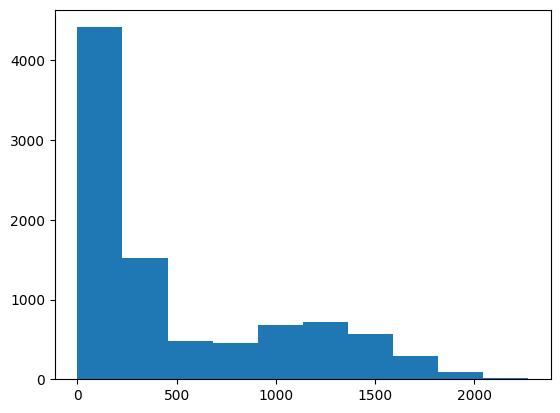

In [25]:
plt.hist(leads['Total Time Spent on Website'])

<AxesSubplot: >

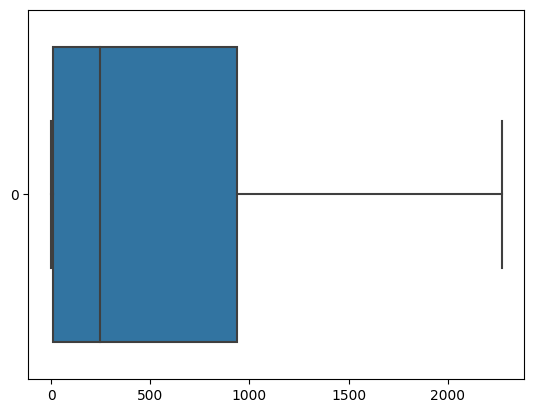

In [26]:
sns.boxplot(leads['Total Time Spent on Website'], orient='h')

<AxesSubplot: >

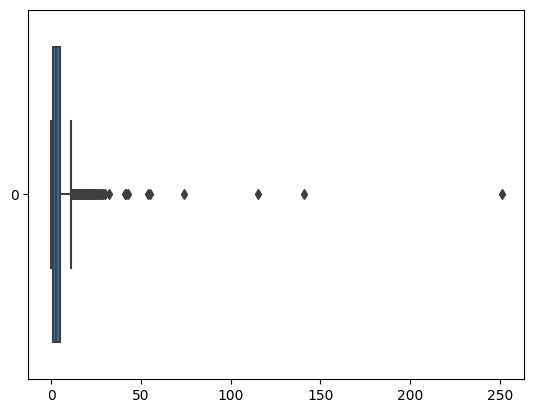

In [27]:
sns.boxplot(leads['TotalVisits'], orient='h')

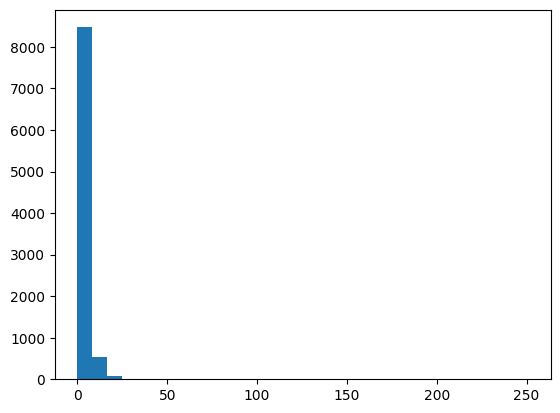

In [28]:
plt.hist(leads['TotalVisits'], bins=30)
plt.show()

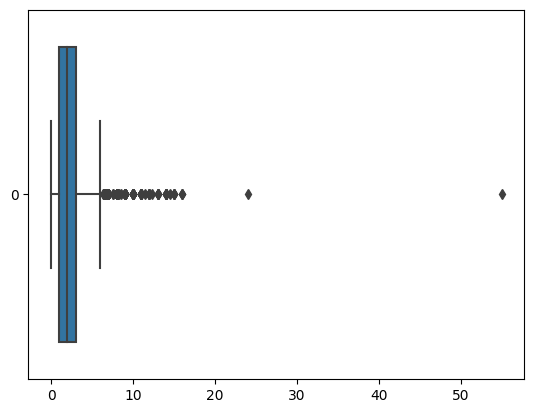

In [29]:
sns.boxplot(leads['Page Views Per Visit'], orient='h')
plt.show()